https://codingdisciple.com/chi-squared-python.html

## Chi-Squared Test for Independence in Python

So far, we've been comparing data with at least one one numerical(continuous) column and one categorical(nominal) column. So what happens if we want to determine the statistical significance of two independent categorical groups of data?

This is where the Chi-squared test for independence is useful.

### Chi-Squared Test Assumptions
We'll be looking at data from the census in 1994. Specifically, we are interested in the relationship between 'sex' and 'hours-per-week' worked. Click here for the documentation and citation of the data. First let's get the assumptions out of the way:

* There must be different participants in each group with no participant being in more than one group. In our case, each individual can only have one 'sex' and can not be in multiple workhour categories.
* Random samples from the population. In our case, the census is a good representation of the population.

### Data Exploration
For the sake of this example, we'll convert the numerical column 'hours-per-week' into a categorical column using pandas. Then we'll assign 'sex' and 'hours_per_week_categories' to a new dataframe.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd
%matplotlib inline

cols = ['age', 'workclass', 'fnlwg', 'education', 'education-num', 
        'marital-status','occupation','relationship', 'race','sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('census.csv', names=cols)

#Create a column for work hour categories.
def process_hours(df):
    cut_points = [0,9,19,29,39,49,1000]
    label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
    df["hours_per_week_categories"] = pd.cut(df["hours-per-week"],
                                             cut_points,labels=label_names)
    return df

data = process_hours(data)
workhour_by_sex = data[['sex', 'hours_per_week_categories']]
workhour_by_sex.head()

,sex,hours_per_week_categories
0,Male,40-49
1,Male,10-19
2,Male,40-49
3,Male,40-49
4,Female,40-49


In [2]:
workhour_by_sex['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [7]:
workhour_by_sex['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

### The Null and Alternate Hypotheses
Recall that we are interested in knowing if there is a relationship between 'sex' and 'hours_per_week_categories'. In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

* H0:There is no statistically significant relationship between sex and the # of hours per week worked.
* Ha:There is a statistically significant relationship between sex and the # of hours per week worked.


### Constructing the Contingency Table
The next step is to format the data into a frequency count table. This is called a Contingency Table, we can accomplish this by using the pd.crosstab() function in pandas.

In [9]:
workhour_by_sex.hours_per_week_categories.value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [39]:
contingency_table = pd.crosstab(
    workhour_by_sex['sex'],
    workhour_by_sex['hours_per_week_categories'],
    margins = True,
    dropna = False
)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


Each cell in this table represents a frequency count. For example, the intersection of the 'Male' row and the '10-19' column of the table would represent the number of males who works 10-19 hours per week from our sample data set. The intersection of the 'All' row and the '50+' column would represent the total number of people who works 50+ hours a week.

## Visualizing the Contingency Table with a Stacked Bar Chart

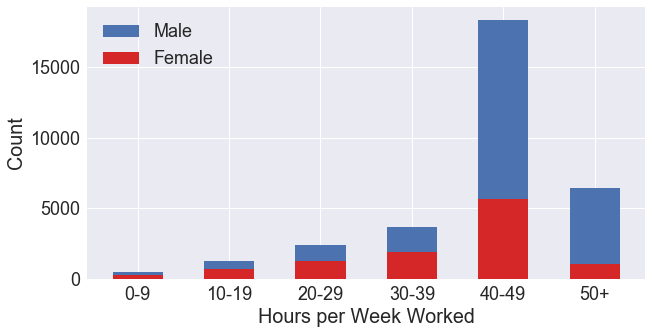

In [40]:
#Assigns the frequency values
malecount = contingency_table.iloc[0][0:6].values
femalecount = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

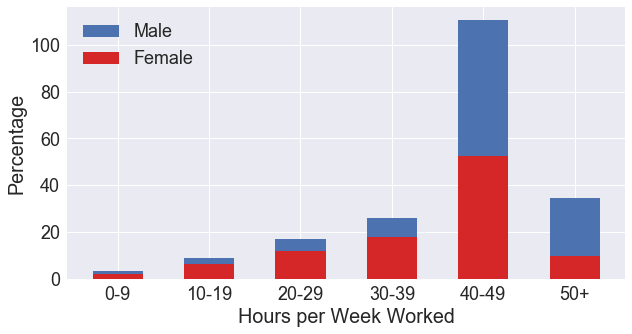

In [41]:
#Assigns the frequency values
malecount = (contingency_table.iloc[0][0:6].values/contingency_table.iloc[0][0:6].sum())*100.
femalecount = (contingency_table.iloc[1][0:6].values/contingency_table.iloc[1][0:6].sum())*100.

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Percentage')
plt.show()

The chart above visualizes our sample data from the census. If there is truly no relationship between sex and the number of hours per week worked. Then the data would show an even ratio split between 'Male' and 'Female' for each time category. For example, if 5% of the females worked 50+ hours, we would expect the same percentage for males who worked 50+ hours.

### The Chi-Squared Test for Independence - Calculation with Numpy

In order to determine whether we accept or reject the null hypothesis. For testing with two categorical variables, we will use the Chi-squared test to compute the p-value. 

$$ \chi^2 = \frac{(observed - expected)^2}{(expected)} $$

Where $\chi^2$ is the test statistic, observecd are values we have in the contingency table, expected are values we would expect assuming the null hypothesis is true. Theoretically speaking, if all the expected values are equal to the observed values, then the $\chi^2$ statistic will be 0. As a result, the null hypothesis will be retained.

First, let's put the observed values into a one dimensional array, reading the contingency table from left to right then top to bottom.







In [43]:
f_obs = np.append(contingency_table.iloc[0][0:6].values, 
                  contingency_table.iloc[1][0:6].values)
f_obs

array([  235,   671,  1287,  1914,  5636,  1028,   223,   575,  1105,
        1753, 12700,  5434], dtype=int64)

Next, we need to calculate the expected values. The expected values assume that null hypothesis is true. We would need to calculate values if there is an equal percentage of males and females for each category. For example, this is how we would calculate the expected value for the top left cell:

Expected no. Females in 0-9 category == (Number of people in 0-9 category / Total no. people) * Total no. Females


In [46]:
#number of females and males
row_sums = contingency_table.iloc[0:2,6].values
row_sums

array([10771, 21790], dtype=int64)

In [47]:
#number of people in each hour category
col_sums = contingency_table.iloc[2,0:6].values
col_sums

array([  458,  1246,  2392,  3667, 18336,  6462], dtype=int64)

In [50]:
#total number of people
total = contingency_table.loc['All', 'All']
total

32561

In [52]:
#expected number 
f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[151.50388501581648,
 412.1699579251252,
 791.2604649734345,
 1213.0234636528362,
 6065.44811277295,
 2137.5941156598383,
 306.4961149841835,
 833.8300420748749,
 1600.7395350265656,
 2453.976536347164,
 12270.551887227051,
 4324.405884340162]

Now that we have all our observed and expected values, we can just plug everything into the Chi-squared test formula.

In [54]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 2287.190943926107


### Degrees of Freedom

To determine the p-value we need to calculate the DoF

DoF = (Number of sex categorical values - 1) * (Number of work hour categorical values - 1) 

In [58]:
len(workhour_by_sex.sex.unique())

2

In [59]:
len(workhour_by_sex.hours_per_week_categories.unique())

6

In [64]:
dof = (len(workhour_by_sex.sex.unique()) - 1) * (len(workhour_by_sex.hours_per_week_categories.unique())-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 5


Now we are ready to look into the Chi-squared distribution table. The cut off for a p-value of 0.05 was 11.070. Our X2 statistic was so large that the p-value is approximately zero. So we have evidence against the null hypothesis.


### The Chi-Squared Test for Independence - Using Scipy
Now that we've gone through all the calculations, it is time to look for shortcuts. Scipy has a function that plugs in all the values for us. Click here for the documentation.

All we need to do is format the observed values into a two-dimensional array and plug it into the function.

In [65]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]], dtype=int64)

In [66]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(2287.190943926107, 0.0, 5)

The results were exactly the same as our calculations with Numpy. The X2 = ~2287, p-value = ~0 and degrees of freedom = 5.

### Conclusions
With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'sex' and the 'hours-per-week' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/